This notebook was created for learning TF2

Here I apply LR on Moore's Law

In [1]:
#imports
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.2.0-rc2


In [2]:
#get data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-05 08:07:29--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-05 08:07:30 (40.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
#load the data 
d = pd.read_csv('moore.csv', header=None).values
x = d[:,0].reshape(-1,1) #making 2-D array
y = d[:,1]

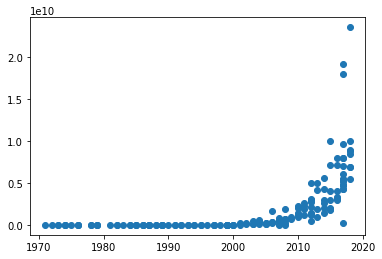

In [4]:
#plotting the data
plt.scatter(x,y)

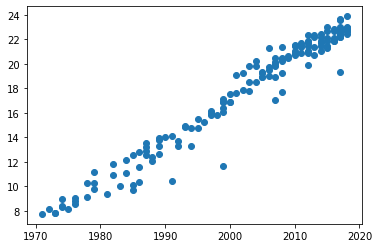

In [5]:
#as data is eponential thus taking log(y)
y = np.log(y)
#plotting
plt.scatter(x,y)

In [0]:
#preprocessing
#cantering x so that the values are not too large
x = x - x.mean()

In [7]:
#tensorflow stuff

#model
m = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape = (1,)), 
  tf.keras.layers.Dense(1)
])


#optimizer
m.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 , momentum = 0.9), loss = 'mse')

#learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#train the model
t = m.fit(x, y, epochs=200, callbacks=[scheduler])



Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 365.2434 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 256.2032 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 326.2207 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 234.1152 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 170.4064 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 139.9695 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 119.3430 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 78.0473 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 48.5120 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 36.3097 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 

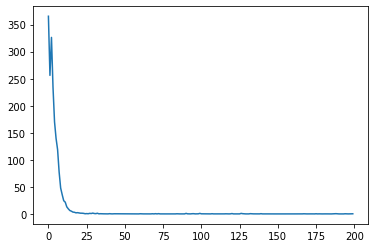

In [8]:
#plot the loss
plt.plot(t.history['loss'], label = "Loss")

In [9]:
#getting the trained wights of the model
#in this case the slope of the line
print(m.layers)
print(m.layers[0].get_weights())

[array([[0.33329102]], dtype=float32), array([17.766714], dtype=float32)]


In [0]:
#the slope of the line is 
slope = m.layers[0].get_weights()[0][0]

In [16]:
print(slope)

[0.33329102]


In [17]:
#considering the situation 
#we can conclude that log_r = slope
#and slope = 0.33329102
#after solving the double time equation we get
#t' - t = (log2 / slope)

print("Time to double:", np.log(2) / slope)

Time to double: [2.0797055]
